In [1]:
from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [7]:
len(train_data[10])

31

In [8]:
len(train_data[1])

56

In [9]:
word_index = reuters.get_word_index()

565248/550378 [==============================] - 0s 0us/step


In [11]:
len(word_index)

30979

In [12]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [20]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results 

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [21]:
def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [22]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 65ms/step - loss: 2.6432 - accuracy: 0.4629 - val_loss: 1.7517 - val_accuracy: 0.6370
Epoch 2/20
16/16 [==============================] - 1s 51ms/step - loss: 1.4390 - accuracy: 0.7085 - val_loss: 1.2947 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 1s 52ms/step - loss: 1.0495 - accuracy: 0.7846 - val_loss: 1.1123 - val_accuracy: 0.7700
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 0.8267 - accuracy: 0.8250 - val_loss: 1.0216 - val_accuracy: 0.7930
Epoch 5/20
16/16 [==============================] - 1s 51ms/step - loss: 0.6602 - accuracy: 0.8591 - val_loss: 0.9751 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5333 - accuracy: 0.8872 - val_loss: 0.9245 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.4295 - accuracy: 0.9114 - val_loss: 0.9030 - val_accuracy: 0.8120
Epoch 8/20
16

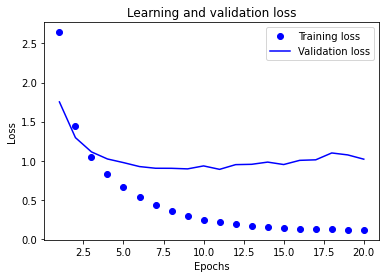

In [35]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning and validation loss')
plt.legend()
plt.show()

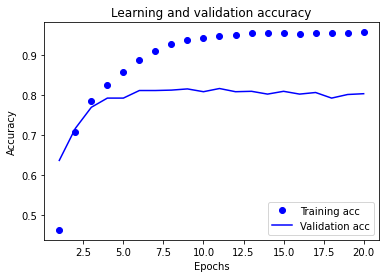

In [36]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning and validation accuracy')
plt.legend()
plt.show()

In [37]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 52ms/step - loss: 0.1073 - accuracy: 0.9592 - val_loss: 1.1316 - val_accuracy: 0.7870
Epoch 2/9
16/16 [==============================] - 1s 48ms/step - loss: 0.1052 - accuracy: 0.9583 - val_loss: 1.0929 - val_accuracy: 0.8070
Epoch 3/9
16/16 [==============================] - 1s 50ms/step - loss: 0.1057 - accuracy: 0.9569 - val_loss: 1.0909 - val_accuracy: 0.8140
Epoch 4/9
16/16 [==============================] - 1s 49ms/step - loss: 0.1048 - accuracy: 0.9578 - val_loss: 1.1319 - val_accuracy: 0.7950
Epoch 5/9
16/16 [==============================] - 1s 48ms/step - loss: 0.1001 - accuracy: 0.9597 - val_loss: 1.2311 - val_accuracy: 0.7790
Epoch 6/9
16/16 [==============================] - 1s 47ms/step - loss: 0.0987 - accuracy: 0.9583 - val_loss: 1.0963 - val_accuracy: 0.8080
Epoch 7/9
16/16 [==============================] - 1s 47ms/step - loss: 0.0990 - accuracy: 0.9579 - val_loss: 1.1330 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

In [38]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18521816562778273

In [40]:
predictions = model.predict(x_test)

In [41]:
predictions[0].shape

(46,)

In [42]:
np.sum(predictions[0])

1.0000001

In [43]:
np.argmax(predictions[0])

3